# Intro

This notebook shows how to:
- [Create and view line annotations](#creating-a-line-annotation)
- [Create and view box annotations](#creating-a-box-annotation)

# Configuration

In [ ]:
%pip install git+https://github.com/SonanceAI/datamint-python-api

If you haven't already, setup your api key:

In [ ]:
# !datamint-config --api-key MY_API_KEY

# Setup-up example Project and data(optional)

creating project

In [ ]:
from datamint.examples import ProjectMR

PROJECT_NAME = 'Example Project MR'

ProjectMR.create(project_name=PROJECT_NAME)

'99a99f48-cc2a-4eb3-a729-2bcaf3288f44'

Go to the web app, select your project, and navigate to 'Project Settings'.
In 'Shapes and regions', add a new line shape named 'Line1':

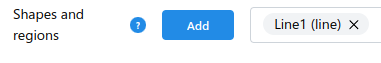

We will be adding editing Project Settings via Python API soon.

# Creating a Line annotation

Reference: [APIHandler.add_line_annotation](https://sonanceai.github.io/datamint-python-api/datamint.apihandler.html#datamint.apihandler.api_handler.APIHandler.add_line_annotation)

In [3]:
from datamint import APIHandler

api = APIHandler()

In [ ]:
res_id = list(api.get_resources(project_name=PROJECT_NAME))[0]['id']  # get the first resource
api.add_line_annotation((0, 0), (10, 30),  # a line starting at (0, 0) and ending at (10, 30), x and y coordinates respectively
                        resource_id=res_id,
                        identifier='Line1',
                        frame_index=0,  # The first frame
                        project=PROJECT_NAME)

The result of the above step can be seen in the web app by selecting the resource in the Files tab:

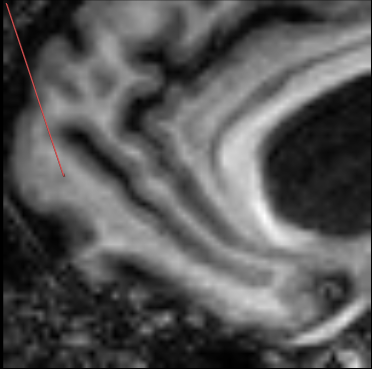

# Creating a Box annotation

Reference: [APIHandler.add_box_annotation](https://sonanceai.github.io/datamint-python-api/datamint.apihandler.html#datamint.apihandler.api_handler.APIHandler.add_box_annotation)

First, add a new box/rectangle shape named 'BoundingBox1' in your project settings (similar to the line shape setup above).

In [ ]:
# Add a box annotation with diagonal corners at (5, 5) and (25, 20)
api.add_box_annotation((5, 5), (25, 20),  # box from top-left (5,5) to bottom-right (25,20)
                       resource_id=res_id,
                       identifier='BoundingBox1',
                       frame_index=0,  # The first frame
                       project=PROJECT_NAME)

Both line and box annotations support:
- **DICOM coordinate conversion**: Automatically convert pixel coordinates to patient coordinates
- **Patient coordinates**: Direct specification of 3D patient coordinates
- **Model annotations**: Associate annotations with specific AI models

### Example with DICOM metadata:

```python
# Assuming you have DICOM metadata
dicom_path = "/path/to/your/dicom/file.dcm"
api.add_box_annotation((10, 10), (50, 50),
                       resource_id=res_id,
                       identifier='DicomBox',
                       frame_index=0,
                       dicom_metadata=dicom_path,  # Automatically converts to patient coordinates
                       coords_system='pixel',
                       project=PROJECT_NAME)
```